# EE2211 Tutorial 8

### by Chua Dingjuan (Oct 2022)

## Question 2 Python Codes

### 2(a) Plot the cost function C(w) as a function of the number of iterations.

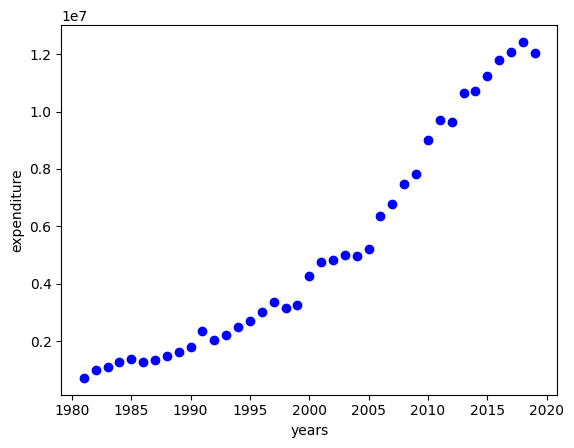

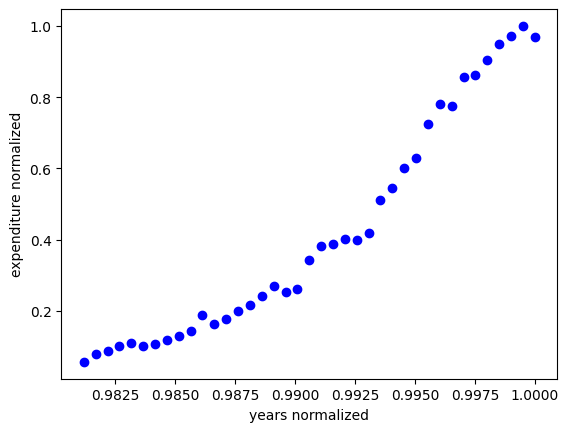

Iter 0 : cost = 8.546351412713127
Iter 400000 : cost = 0.1157156075463752
Iter 800000 : cost = 0.08902105911471397
Iter 1200000 : cost = 0.08831833150886767
Iter 1600000 : cost = 0.08829602432919924


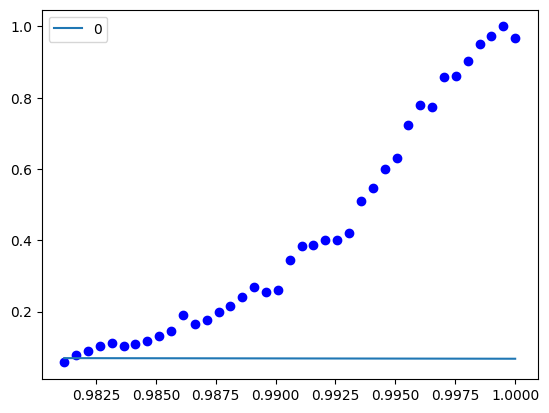

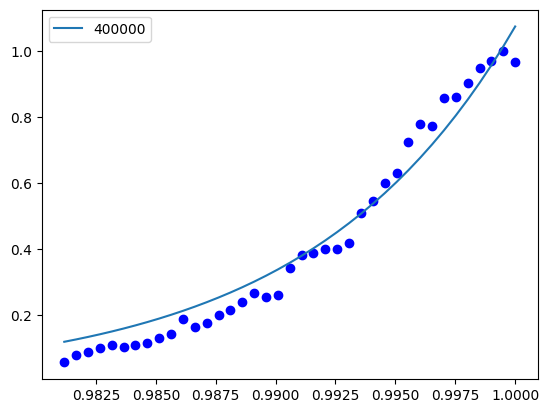

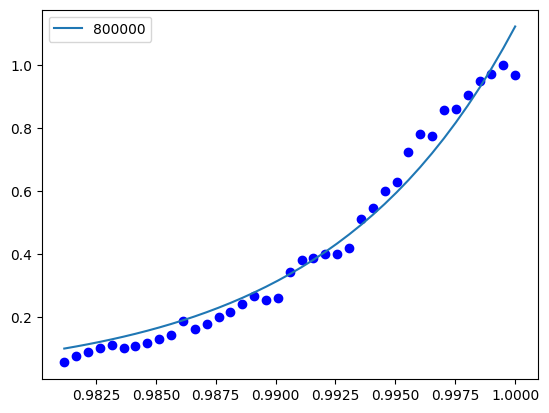

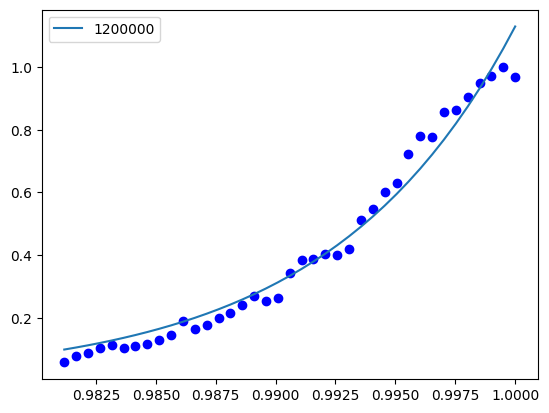

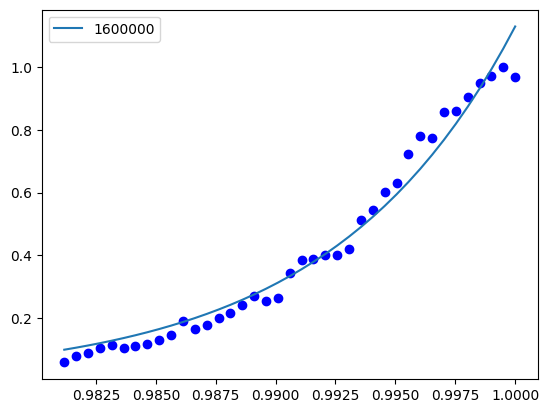

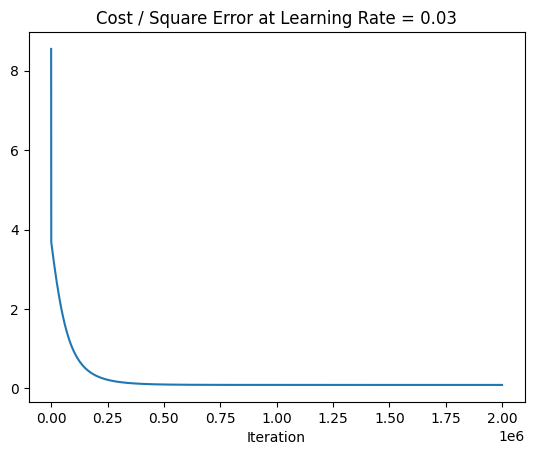

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing data from .csv using pandas read_csv function
df = pd.read_csv("government-expenditure-on-education.csv")
expenditure = df['total_expenditure_on_education'].to_numpy()
years = df['year'].to_numpy()


# Nnormalization of x and y variables
x = years/max(years)
y = expenditure/max(expenditure)
X = np.column_stack((np.ones((len(x))),x))


# Plotting below for students visualization
# Not required in question
plt.figure(1)
plt.plot(years,expenditure,'bo')
plt.xlabel('years')
plt.ylabel('expenditure')

plt.figure(2)
plt.plot(x,y,'bo')
plt.xlabel('years normalized')
plt.ylabel('expenditure normalized')
plt.show()


# Implementation of Gradient Descent
num_iter = 2000000


# Initialization
w = np.zeros(2)
learning_rate = 0.03

#calculates the pred y value current w value across all X points
pred_y = np.exp(-X @ w)

#creating a zeroes matrix to store the cost values
cost = np.zeros(num_iter)


# Running gradient descent for 2000000 iterations
for i in range(0, num_iter):

    # gradient at this current w
    # note that * and not @ is used as you want to multiply error w pred_y for all points
    gradient = -2 * (pred_y - y) * pred_y @ X

    #** Finding NEW w **#    
    w = w - learning_rate * gradient

    pred_y = np.exp(-X @ w)

    current_cost = np.sum((pred_y - y)*(pred_y - y))
    cost[i] = current_cost

    ## Plotting and Printing below for students visualization
    ## Not required in question
    ## at i = multiples of 200000
    if(i % 400000 == 0):            
        print('Iter', i, ': cost =', current_cost)
        plt.figure(i)
        plt.plot(X[:, 1],y,'bo')
        plt.plot(X[:, 1],pred_y,label=i)
        plt.legend()

plt.show()

# Plotting cost over iterations
plt.plot(np.arange(0,num_iter),cost)
plt.title('Cost / Square Error at Learning Rate = 0.03')
plt.xlabel('Iteration')
plt.show()





### (b) Use the fitted parameters to plot the predicted educational expenditure from year 1981 to year 2023.


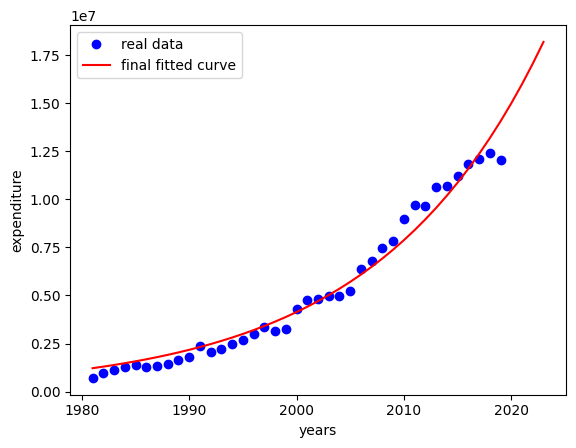

In [4]:
#1b - Extrapolate to 2024
#Generating a new list of years, from 1981 to 2024
year_new = np.arange(min(years), 2024)


# Normalizing and creating X matrix to find the predicted y values 
x_new = year_new / max(years)
X_new = np.column_stack((np.ones((len(x_new))),x_new))
pred_y_new = np.exp(-X_new @ w)


#Plotting De-Normalized Training Data & Final exponential curve
plt.plot(years,expenditure,'bo',label='real data')
plt.plot(year_new,pred_y_new*max(expenditure),'r',label='final fitted curve')
plt.xlabel('years')
plt.ylabel('expenditure')
plt.legend()
plt.show()

